In [199]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [133]:
img = cv2.imread('pika.jpg')

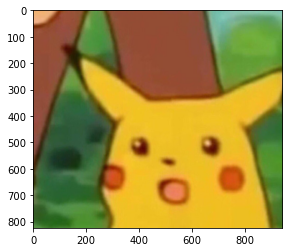

In [134]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [135]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

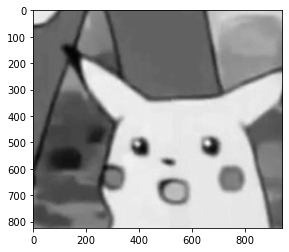

In [136]:
plt.imshow(img, cmap='gray')

In [137]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
img2 = cv2.drawKeypoints(gray, kp, img)

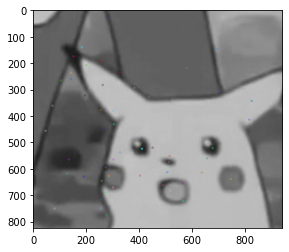

In [139]:
plt.imshow(img2)

In [140]:
len(kp)

75

In [141]:
des.shape

(75, 128)

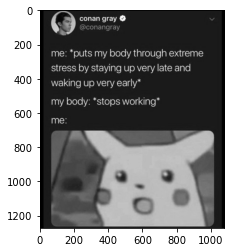

In [142]:
scene1 = cv2.imread('scene1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(scene1, cv2.COLOR_BGR2RGB))

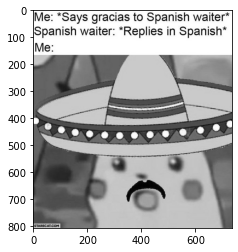

In [143]:
scene2 = cv2.imread('scene2.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(scene2, cv2.COLOR_BGR2RGB))

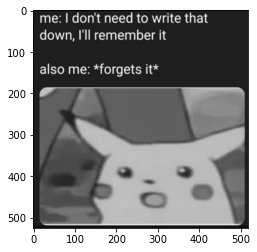

In [144]:
scene3 = cv2.imread('scene3.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(scene3, cv2.COLOR_BGR2RGB))

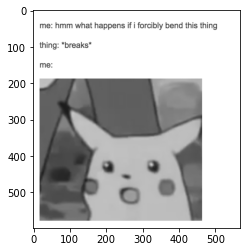

In [145]:
scene4 = cv2.imread('scene4.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(scene4, cv2.COLOR_BGR2RGB))

In [146]:
kp1, des1 = sift.detectAndCompute(scene1, None)
kp2, des2 = sift.detectAndCompute(scene2, None)
kp3, des3 = sift.detectAndCompute(scene3, None)
kp4, des4 = sift.detectAndCompute(scene4, None)

In [147]:
# create BFMatcher object
bf = cv2.BFMatcher()

In [148]:
# Match descriptors.
matches1 = bf.match(des, des1)

In [149]:
# Sort them in the order of their distance.
matches1 = sorted(matches1, key = lambda x:x.distance)

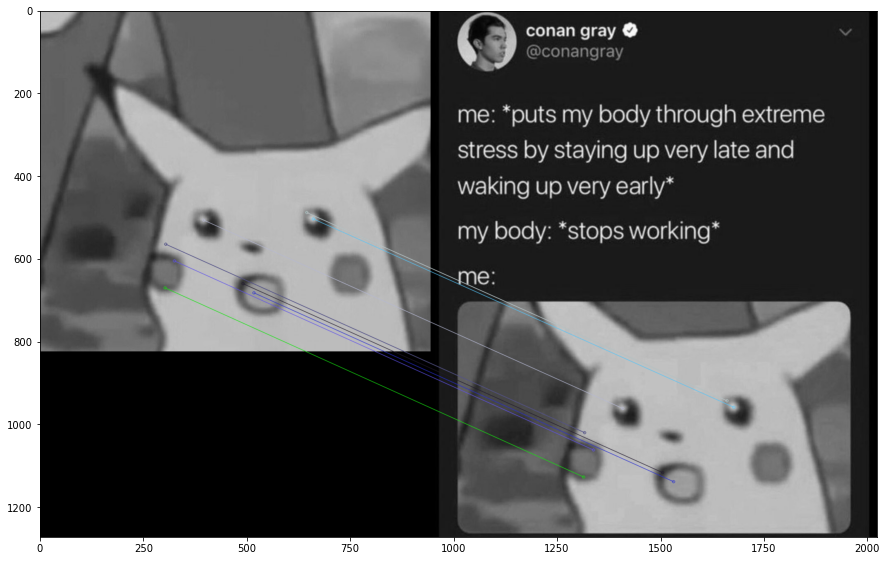

In [150]:
# Draw first 10 matches.
res1 = cv2.drawMatches(img, kp, scene1, kp1, matches1[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (15, 15))
plt.imshow(res1)

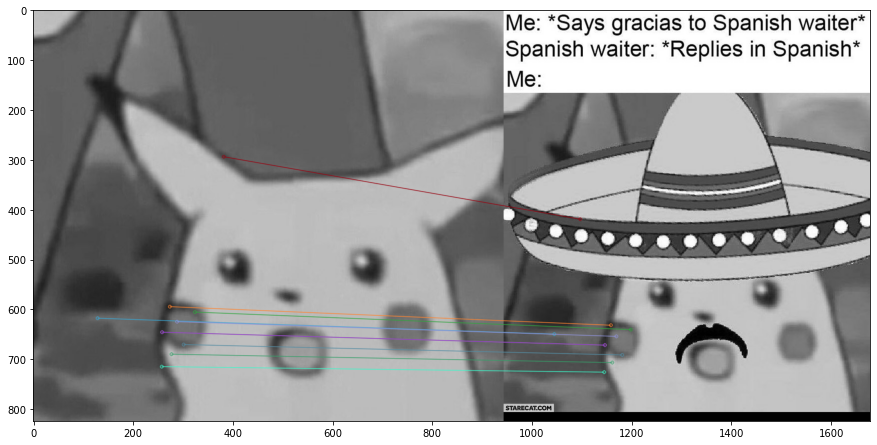

In [151]:
# Draw first 10 matches.
matches2 = bf.match(des, des2)
matches2 = sorted(matches2, key = lambda x:x.distance)
res2 = cv2.drawMatches(img, kp, scene2, kp2, matches2[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (15, 15))
plt.imshow(res2)

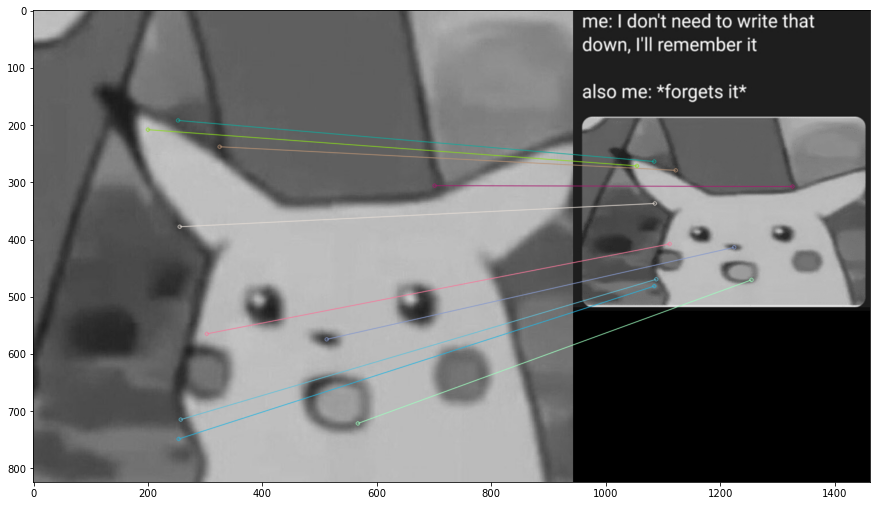

In [152]:
# Draw first 10 matches.
matches3 = bf.match(des, des3)
matches3 = sorted(matches3, key = lambda x:x.distance)
res3 = cv2.drawMatches(img, kp, scene3, kp3, matches3[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (15, 15))
plt.imshow(res3)

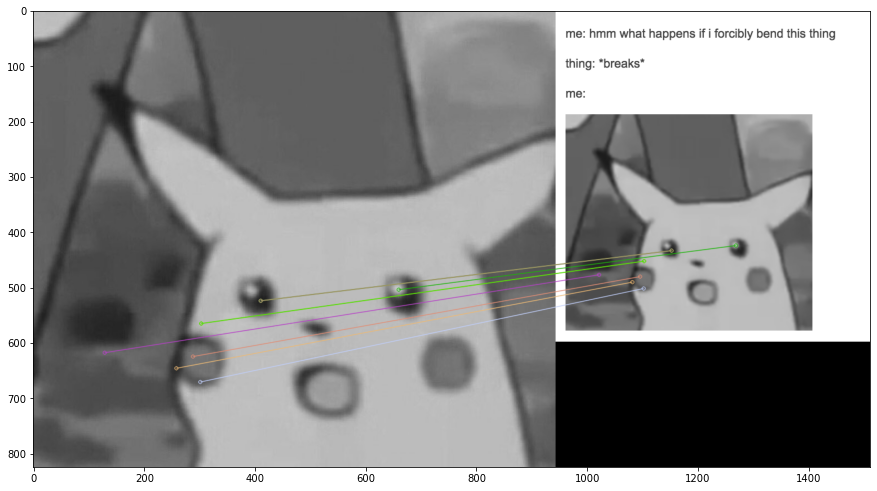

In [153]:
# Draw first 10 matches.
matches4 = bf.match(des, des4)
matches4 = sorted(matches4, key = lambda x:x.distance)
res4 = cv2.drawMatches(img, kp, scene4, kp4, matches4[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (15, 15))
plt.imshow(res4)

In [158]:
des.shape

(75, 128)

In [157]:
des1.shape

(1819, 128)

In [178]:
matches1[0].distance, matches1[0].trainIdx, matches1[0].queryIdx, matches1[0].imgIdx

(14.352700233459473, 1585, 65, 0)

In [166]:
des[0]

array([ 17.,   5.,   3.,   7.,  13.,   3.,   2.,  28.,  60.,   6.,   2.,
        22., 153.,  20.,   0.,   2., 178.,  36.,   0.,   1.,  16.,   2.,
         0.,   3.,  49.,   6.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
         3.,   9.,  21.,  14.,   1.,   0.,   1.,  62.,   2.,   1.,  30.,
       161.,  14.,   0.,   3., 178.,  16.,   0.,   2.,  20.,   3.,   0.,
        10.,  78.,   8.,   2.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
         6.,   7.,   4.,   5.,  23.,  21.,  41.,   1.,   0.,   2.,  85.,
        88.,  22.,  12., 178.,  21.,   0.,   0.,  17.,  16.,   1.,  13.,
        86.,   7.,   0.,   0.,   0.,   1.,   5.,   4.,   9.,   1.,   1.,
         1.,   1.,   3.,  31.,  61.,  16.,   3.,   1.,   4., 126.,  61.,
        25.,  12., 178.,  37.,   0.,   0.,  47.,  10.,   0.,   1.,  90.,
        14.,   0.,   0.,   1.,   1.,   1.,   1.], dtype=float32)

In [167]:
des1[0]

array([  1.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,  10.,   1.,   1.,
         0.,   0.,   0.,   0.,  17.,   9.,   0.,   0.,   0.,   0.,   9.,
        60.,  66.,  30.,  32.,   0.,   0.,   4.,  42.,  50.,   8.,   2.,
         2.,   2.,   0.,   0.,   0.,   0.,   2.,  82.,   5.,   2.,   0.,
         0.,   0.,   0.,  28., 144.,   6.,   0.,   0.,   7.,  34.,  66.,
       144.,  12.,   5.,   1.,   0., 131., 144.,  60.,  27.,   1.,   0.,
         1.,   0.,   0.,   0.,   2.,   5.,  85.,  28.,   2.,   0.,   0.,
         0.,   1.,   9., 144., 144.,   1.,   0.,  13.,  11.,   3.,  22.,
        42.,  55.,   2.,   1., 144., 144.,   4.,   6.,   2.,   1.,   0.,
         0.,   1.,   1.,   0.,   2.,  11.,  20.,   1.,   1.,   2.,   2.,
         0.,   0.,  80., 144.,   2.,   0.,   1.,   0.,   0.,   0.,  19.,
       144.,  32.,   1.,  17.,  59.,   3.,   0.], dtype=float32)

In [175]:
def l2(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

In [176]:
l2(des[0], des1[0])

571.2784

In [180]:
matches1[0]

<DMatch 000002979CE2D670>

In [188]:
test_match = cv2.DMatch(_distance=14.3527, _trainIdx=1585, _queryIdx=65, _imgIdx=0)

In [189]:
test_match.distance, test_match.trainIdx, test_match.queryIdx, test_match.imgIdx

(14.352700233459473, 1585, 65, 0)

In [198]:
len(matches)

75

In [212]:
cust_matches1 = []

for i in range(len(des)):
    max_dist = math.inf
    train_idx = 0
    
    for j in range(len(des1)):
        dist = l2(des[i], des1[j])
        
        if dist < max_dist:
            max_dist = dist
            train_idx = j
            
    cust_matches1.append(cv2.DMatch(_distance=max_dist, _trainIdx=train_idx, _queryIdx=i, _imgIdx=0))

In [214]:
cust_matches1[0].distance, cust_matches1[0].trainIdx, cust_matches1[0].queryIdx, cust_matches1[0].imgIdx

(14.352700233459473, 1585, 65, 0)

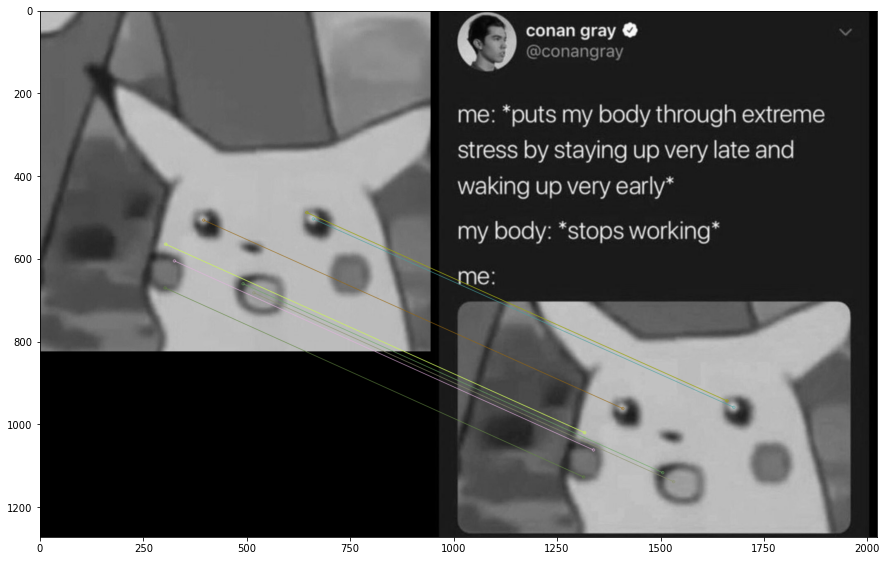

In [213]:
cust_matches1 = sorted(cust_matches1, key = lambda x:x.distance)
cust_res1 = cv2.drawMatches(img, kp, scene1, kp1, cust_matches1[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (15, 15))
plt.imshow(cust_res1)

In [215]:
def match(des, des1):
    cust_matches1 = []

    for i in range(len(des)):
        max_dist = math.inf
        train_idx = 0

        for j in range(len(des1)):
            dist = l2(des[i], des1[j])

            if dist < max_dist:
                max_dist = dist
                train_idx = j

        cust_matches1.append(cv2.DMatch(_distance=max_dist, _trainIdx=train_idx, _queryIdx=i, _imgIdx=0))
    return cust_matches1

In [216]:
def sort_match(matches):
    return sorted(matches, key = lambda x:x.distance)

In [217]:
def draw_matches(img, kp, scene1, kp1, cust_matches1):
    cust_res1 = cv2.drawMatches(img, kp, scene1, kp1, cust_matches1, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize = (15, 15))
    plt.imshow(cust_res1)
    plt.show()

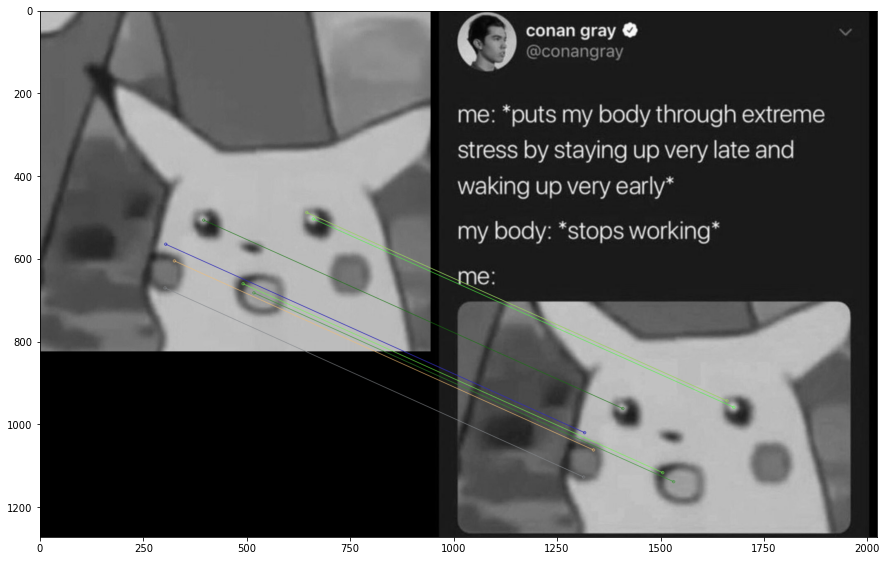

In [219]:
cust_matches1 = match(des, des1)
cust_matches1 = sort_match(cust_matches1)
draw_matches(img, kp, scene1, kp1, cust_matches1[:10])

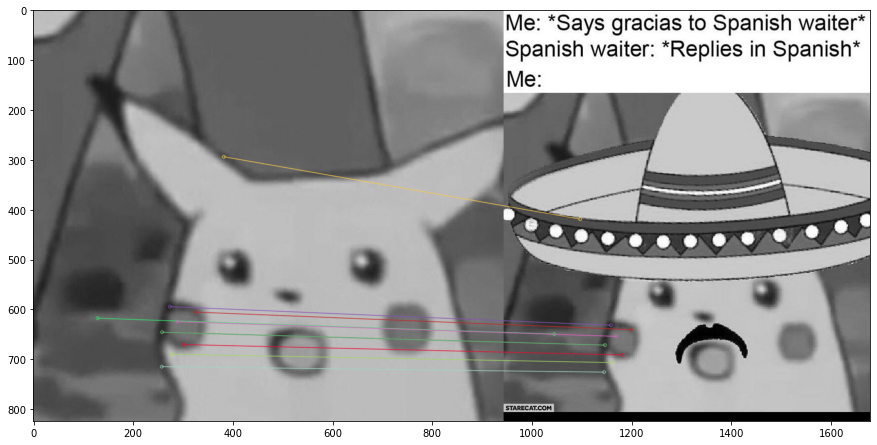

In [220]:
cust_matches2 = match(des, des2)
cust_matches2 = sort_match(cust_matches2)
draw_matches(img, kp, scene2, kp2, cust_matches2[:10])

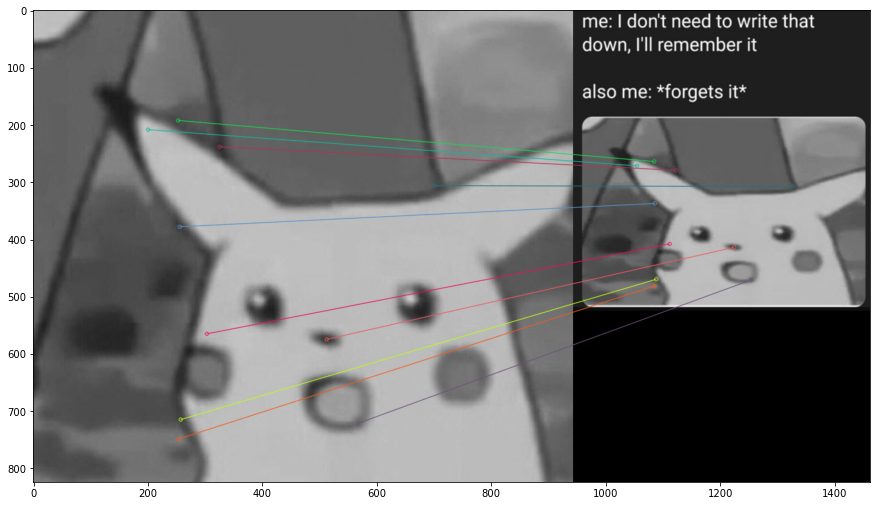

In [221]:
cust_matches3 = match(des, des3)
cust_matches3 = sort_match(cust_matches3)
draw_matches(img, kp, scene3, kp3, cust_matches3[:10])

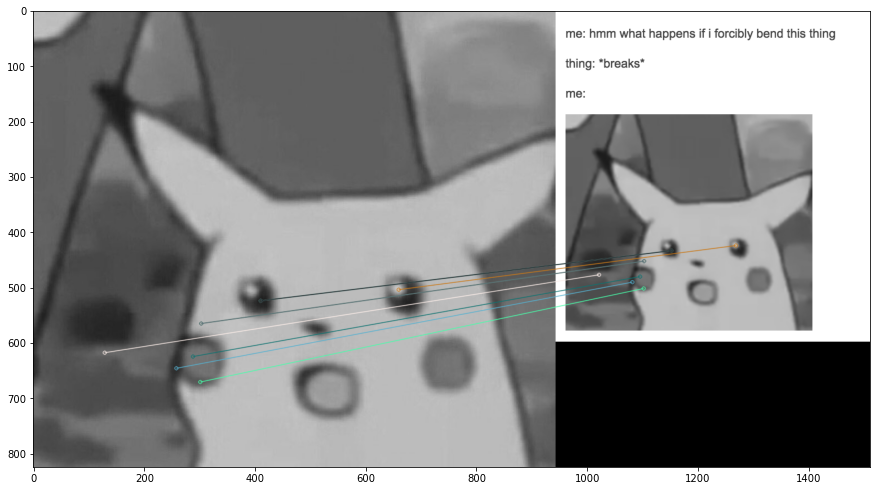

In [222]:
cust_matches4 = match(des, des4)
cust_matches4 = sort_match(cust_matches4)
draw_matches(img, kp, scene4, kp4, cust_matches4[:10])